Dimensiunea imaginii: 1600 x 1000
Număr de canale: 3


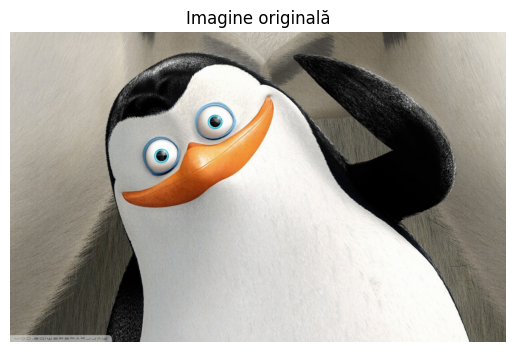

In [1]:
## 3. Prelucrarea imaginilor
### 3.1: Vizualizarea imaginilor
import cv2
import matplotlib.pyplot as plt

imagine = cv2.imread('pinguin.jpeg')
inaltime, latime, canale = imagine.shape

print(f"Dimensiunea imaginii: {latime} x {inaltime}")
print(f"Număr de canale: {canale}")
imagine_rgb = cv2.cvtColor(imagine, cv2.COLOR_BGR2RGB)

plt.imshow(imagine_rgb)
plt.title("Imagine originală")
plt.axis("off")
plt.show()


Imaginea a fost redimensionată la: 224 x 224


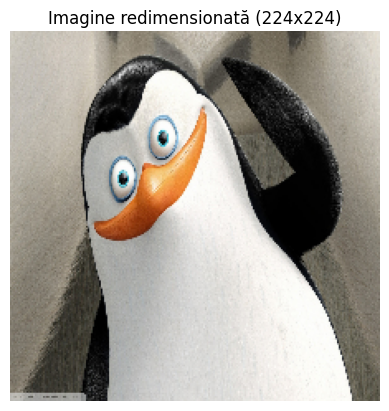

In [2]:
### 3.2: Redimensionarea imaginilor
latime_noua, inaltime_noua = 224, 224
imagine_redimensionata = cv2.resize(imagine, (latime_noua, inaltime_noua))

print(f"Imaginea a fost redimensionată la: {latime_noua} x {inaltime_noua}")

imagine_redimensionata_rgb = cv2.cvtColor(imagine_redimensionata, cv2.COLOR_BGR2RGB)

plt.imshow(imagine_redimensionata_rgb)
plt.title("Imagine redimensionată (224x224)")
plt.axis("off")
plt.show()


Valori minime după normalizare: 0.00
Valori maxime după normalizare: 32.00


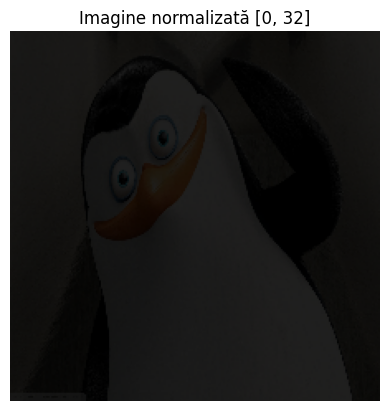

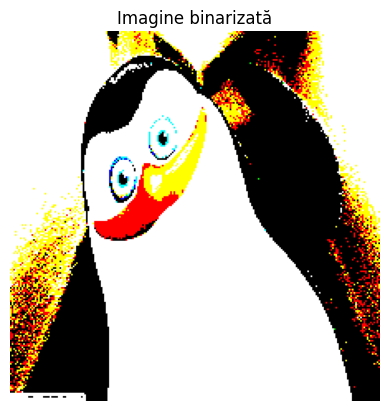

In [3]:
### 3.3: Normalizarea pixelilor

import numpy as np

imagine_float = imagine_redimensionata.astype(np.float32)
imagine_norm = (imagine_float / 255.0) * 32.0

print(f"Valori minime după normalizare: {imagine_norm.min():.2f}")
print(f"Valori maxime după normalizare: {imagine_norm.max():.2f}")

imagine_norm_rgb = cv2.cvtColor(imagine_norm.astype(np.uint8), cv2.COLOR_BGR2RGB)
plt.imshow(imagine_norm_rgb)
plt.title("Imagine normalizată [0, 32]")
plt.axis("off")
plt.show()
prag = 16

imagine_bin = np.where(imagine_norm > prag, 255, 0).astype(np.uint8)
imagine_bin_rgb = cv2.cvtColor(imagine_bin, cv2.COLOR_BGR2RGB)
plt.imshow(imagine_bin_rgb, cmap='gray')
plt.title("Imagine binarizată")
plt.axis("off")
plt.show()


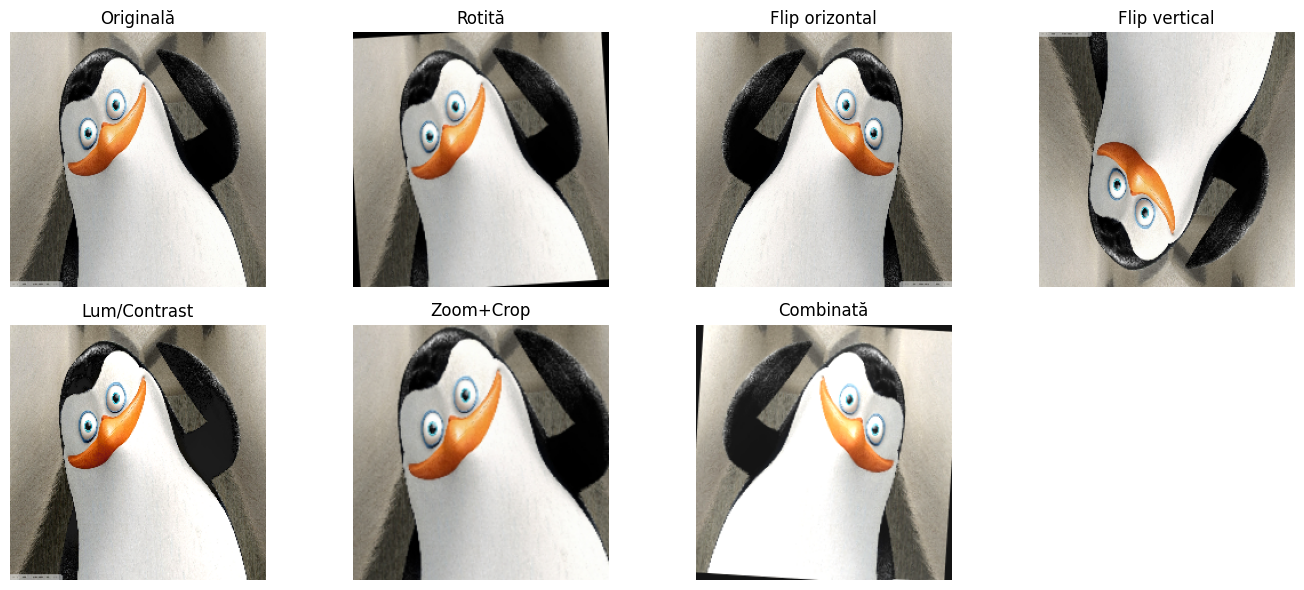

In [6]:
### 3.4: Augmentarea datelor de imagine

import random

img = imagine_redimensionata.copy()

unghi = random.uniform(-15, 15)
h, w = img.shape[:2]
centru = (w // 2, h // 2)
matrice_rotatie = cv2.getRotationMatrix2D(centru, unghi, 1.0)
imagine_rotita = cv2.warpAffine(img, matrice_rotatie, (w, h))

imagine_flip_oriz = cv2.flip(img, 1)
imagine_flip_vert = cv2.flip(img, 0)
alpha = random.uniform(0.8, 1.2)
beta = random.randint(-30, 30)
imagine_lum_con = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

zoom_factor = random.uniform(1.1, 1.3)
new_w, new_h = int(w * zoom_factor), int(h * zoom_factor)
imagine_zoomata = cv2.resize(img, (new_w, new_h))

x_start = random.randint(0, new_w - w)
y_start = random.randint(0, new_h - h)
imagine_cropped = imagine_zoomata[y_start:y_start+h, x_start:x_start+w]

img_combo = cv2.convertScaleAbs(imagine_rotita, alpha=1.1, beta=20)
img_combo = cv2.flip(img_combo, 1)


imagini = [img, imagine_rotita, imagine_flip_oriz, imagine_flip_vert, imagine_lum_con, imagine_cropped, img_combo]
titluri = ["Originală", "Rotită", "Flip orizontal", "Flip vertical", "Lum/Contrast", "Zoom+Crop", "Combinată"]

plt.figure(figsize=(14, 6))
for i in range(len(imagini)):
      plt.subplot(2, 4, i+1)
      plt.imshow(cv2.cvtColor(imagini[i], cv2.COLOR_BGR2RGB))
      plt.title(titluri[i])
      plt.axis("off")
plt.tight_layout()
plt.show()


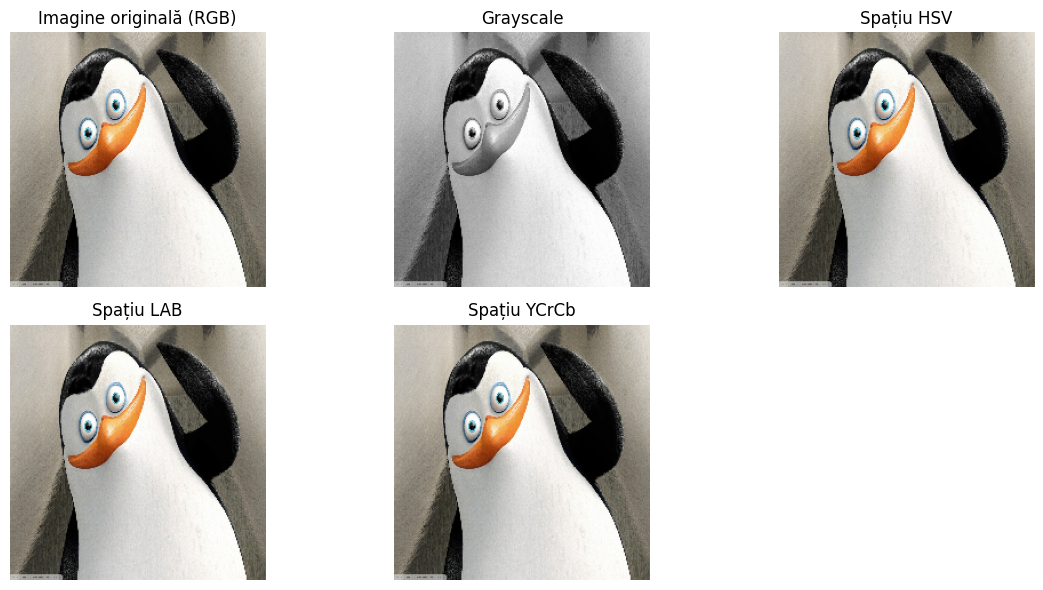

In [5]:
### 3.5
imagine_gray = cv2.cvtColor(imagine_redimensionata, cv2.COLOR_BGR2GRAY)
imagine_hsv = cv2.cvtColor(imagine_redimensionata, cv2.COLOR_BGR2HSV)
imagine_lab = cv2.cvtColor(imagine_redimensionata, cv2.COLOR_BGR2LAB)
imagine_ycrcb = cv2.cvtColor(imagine_redimensionata, cv2.COLOR_BGR2YCrCb)
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(imagine_redimensionata, cv2.COLOR_BGR2RGB))
plt.title("Imagine originală (RGB)")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(imagine_gray, cmap='gray')
plt.title("Grayscale")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(imagine_hsv, cv2.COLOR_HSV2RGB))
plt.title("Spațiu HSV")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(imagine_lab, cv2.COLOR_LAB2RGB))
plt.title("Spațiu LAB")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(imagine_ycrcb, cv2.COLOR_YCrCb2RGB))
plt.title("Spațiu YCrCb")
plt.axis("off")

plt.tight_layout()
plt.show()
